In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential # Sequential API let's you create a model layer by layer. 

from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

import numpy as np 


**Conecting this notebook with google-drive**


In [2]:
from google.colab import drive
drive.mount('/content/drive')
# For accessing files in google drive.


Mounted at /content/drive


**Bring in the data into this notebook**

In [3]:
#Our image datasets have different dimensions, so we define our preferred dimension.
img_width = 150
img_height = 150

train_data_dir = '/content/drive/MyDrive/ML-image-classification/image_data/training'
validation_data_dir = '/content/drive/MyDrive/ML-image-classification/image_data/validation'
train_samples = 20 #explain later
validation_samples = 10 #explain later
epochs = 10
batch_size = 10  # 10 randomly selected images  

**Define a simple CNN model**

In [4]:
model = Sequential() 

model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3)))
#32 filters with 3*3 size, input image = (150, 150, 3) where 3 is the channel.
model.add(Activation('relu')) #relu, activation funtion to remove the negative values.
model.add(MaxPooling2D(pool_size=(2, 2))) #maxpooling with 2*2 filter, stride=2.

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu')) #relu, activation funtion to remove the negative values.
model.add(MaxPooling2D(pool_size=(2, 2))) #maxpooling with 2*2 filter, stride=2.

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64)) #hidden layer with 64Neurons.
model.add(Activation('relu')) 
model.add(Dropout(0.5)) #dropping some neurons.
model.add(Dense(1)) 
model.add(Activation('sigmoid')) #apply activation function sigmoid

In [5]:
model.summary() #summary of the model.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])  #loss means cost function.  #activation function adam to optimize the image.


**Data Augmentation**
image data augmentation is a technique that can be used to artificially expand the size of the training set by creating modified versions of images in the dataset in order to reduce overfitting.

Keras provides us the capability to fit our models using image data augmentation via imageDataGenerator that we saw earlier.

In [7]:

train_datagen = ImageDataGenerator(
    rescale=1. / 255, #rescaling the pixels.
    shear_range=0.2, #counterclockwise direction.
    zoom_range=0.2, #randomly zooming inside the images.
    horizontal_flip=True) #randomly flips horizontally.


In [8]:
train_generator = train_datagen.flow_from_directory( #import the data and pass it through the imagedatagenerator.
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary') #class mode= binary(cat or dog), where class = 0 and dog = 1.
#reading the train data.


Found 198 images belonging to 2 classes.


In [ ]:

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
print(train_generator.class_indices) #(cat = 0, dog = 1)

{'Cat': 0, 'Dog': 1}


In [ ]:
imgs, labels = next(train_generator) #iterative process

In [ ]:
from skimage import io

def imshow(image_RGB): ####imshow: to show the image
  io.imshow(image_RGB)
  io.show()
  #function to see the image.

10
1.0


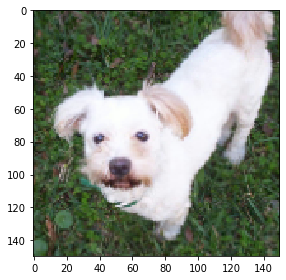

0.0


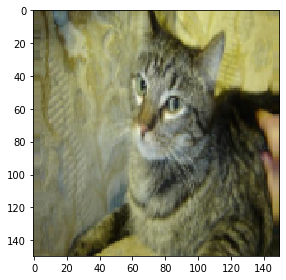

0.0


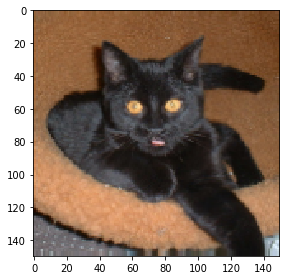

1.0


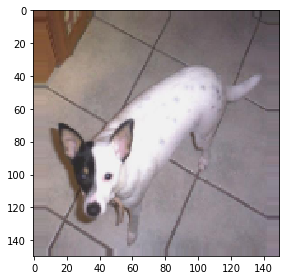

1.0


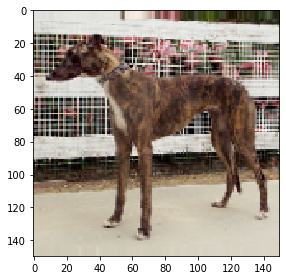

0.0


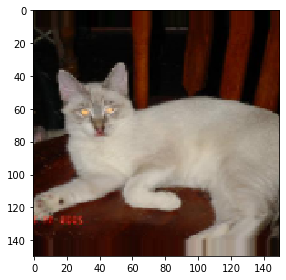

0.0


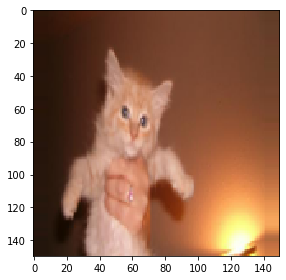

0.0


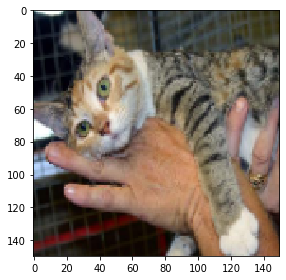

1.0


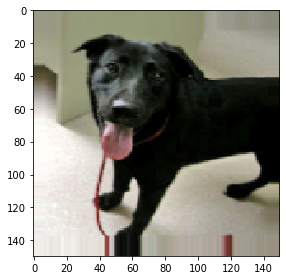

1.0


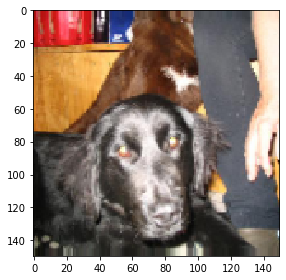

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next() # The next() function returns the next item in an iterator.
#the code will give 10 images of dog and cat since the batch size =10, if the code is ran again, it will show another 10 images.
print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [ ]:
validation_generator = test_datagen.flow_from_directory( ####validation data
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 100 images belonging to 2 classes.


In [ ]:
history = model.fit_generator( ###fitting the model (fit.generator)
    train_generator,
    steps_per_epoch=train_samples,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
20/20 [==============================] - 148s 7s/step - loss: 0.7214 - accuracy: 0.4899 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 2/10
20/20 [==============================] - 8s 406ms/step - loss: 0.6924 - accuracy: 0.5202 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
20/20 [==============================] - 8s 402ms/step - loss: 0.7006 - accuracy: 0.5152 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 4/10
20/20 [==============================] - 8s 407ms/step - loss: 0.6887 - accuracy: 0.5101 - val_loss: 0.6866 - val_accuracy: 0.5000
Epoch 5/10
20/20 [==============================] - 8s 408ms/step - loss: 0.6900 - accuracy: 0.5505 - val_loss: 0.6847 - val_accuracy: 0.6000
Epoch 6/10
20/20 [==============================] - 8s 403ms/step - loss: 0.6817 - accuracy: 0.5859 - val_loss: 0.6710 - val_accuracy: 0.6900
Epoch 7/10
20/20 [==============================] - 8s 406ms/step - loss: 0.7053 - accuracy: 0.5909 - val_loss: 0.6818 - val_accuracy: 0.6400
Epoch 8

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


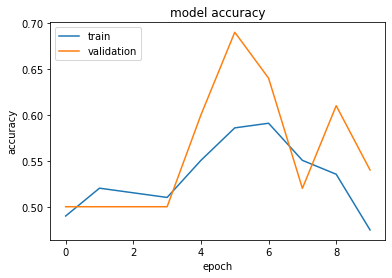

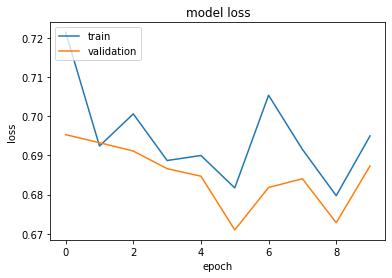

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
import operator
from pathlib import Path
import logging, os
from google.colab import files
from keras.preprocessing import image


[1.]


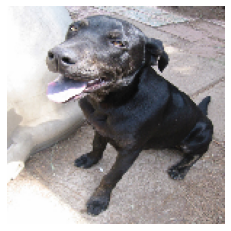

236.jpg: dog

[1.]


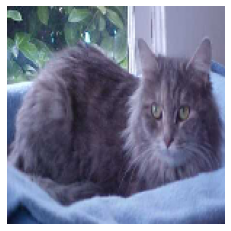

3111.jpg: dog

[1.]


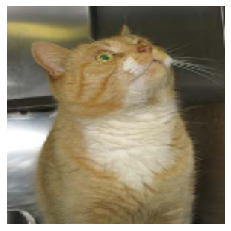

2512.jpg: dog

[1.]


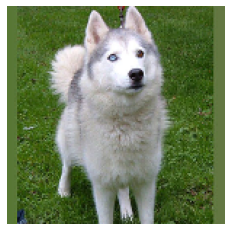

310.jpg: dog

[0.99999833]


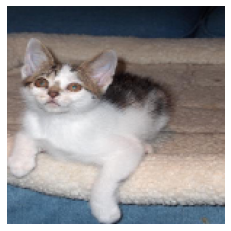

2658.jpg: dog

[1.]


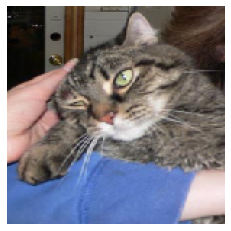

234.jpg: dog

[1.]


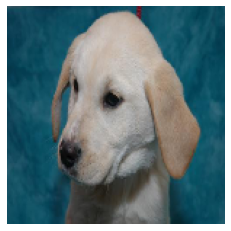

2994.jpg: dog

[0.9999866]


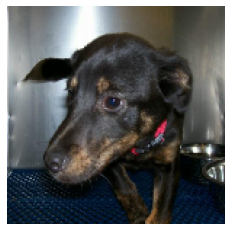

3285.jpg: dog

Total Dogs : 8
Total Cats : 0


In [ ]:
#predict from test repository
dog_counter = 0 
cat_counter  = 0
image_path = "/content/drive/MyDrive/ML-image-classification/image_data/test"

images = []
    
# load all images into a list
for im in os.listdir(image_path):
        img = os.path.join(image_path, im)#This is a PIL image
        img = image.load_img(img, target_size=(img_width, img_height))#covert the pil into 3D tensor with shape (150,150,3)
        x = image.img_to_array(img)#convert the 3D tensor to 4D tensor with shape (1,150,150,3)
        x = np.expand_dims(x, axis=0)

        images = np.vstack([x]) #all the images in a stack #Set the pixles into one array.
        classes = model.predict(x) #gives the probability.

        print(classes[0])
        plt.axis("off")
        plt.imshow(img)
        plt.show()
        
        if classes[0] <= 0.5: ##if pixels>0.5=1 else 0.
          print(im + ": " + 'cat\n')
          cat_counter += 1
        else:
          print(im + ": " + 'dog\n' )
          dog_counter += 1
print("Total Dogs :",dog_counter)
print("Total Cats :",cat_counter)